## 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

## 2. Dataset Walkthrough
1.   Loading the Dataset
2.   Viewing the dataset

1.   Shape of Dataset
2.   Basic description

1.   Checking for NULL values


In [2]:
df = pd.read_csv('symptoms_pr.csv')

In [3]:
df.head()

,loss_of_smell,tremors,restless_leg,fatigue,vision_problem,freezing,family_history,speech_difficulty,hypomimia,depression,postural_instability,urinary_problem,irritability,parkinsons
0,0,0,0,1,0,0,0,1,0,1,1,0,0,1
1,0,0,0,0,1,0,1,0,1,1,1,0,0,1
2,0,0,0,0,0,0,0,1,1,1,0,1,0,1
3,1,0,0,0,1,0,0,0,1,1,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(4920, 14)

In [5]:
df.describe()

,loss_of_smell,tremors,restless_leg,fatigue,vision_problem,freezing,family_history,speech_difficulty,hypomimia,depression,postural_instability,urinary_problem,irritability,parkinsons
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.232114,0.030894,0.049390,0.066260,0.434553,0.452642,0.450000,0.455691,0.455894,0.457927,0.463211,0.437195,0.105691,0.863008
std,0.422224,0.173049,0.216703,0.248762,0.495749,0.497803,0.497544,0.498083,0.498102,0.498277,0.498695,0.496090,0.307473,0.343874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

loss_of_smell           0
tremors                 0
restless_leg            0
fatigue                 0
vision_problem          0
freezing                0
family_history          0
speech_difficulty       0
hypomimia               0
depression              0
postural_instability    0
urinary_problem         0
irritability            0
parkinsons              0
dtype: int64

In [7]:
df.columns

Index(['loss_of_smell', 'tremors', 'restless_leg', 'fatigue', 'vision_problem',
       'freezing', 'family_history', 'speech_difficulty', 'hypomimia',
       'depression', 'postural_instability', 'urinary_problem', 'irritability',
       'parkinsons'],
      dtype='object')

## 3. EDA

In [8]:
df_ = df[df['parkinsons'] == 1]

In [9]:
cols = list(df_.columns)
cols = cols[:-1]

In [10]:
def counts(col):
    c = 0
    for i in df_[col]:
        if i == 1:
            c += 1
            
    return c

In [11]:
counts_cols = []

for i in cols:
    counts_cols.append(counts(i))

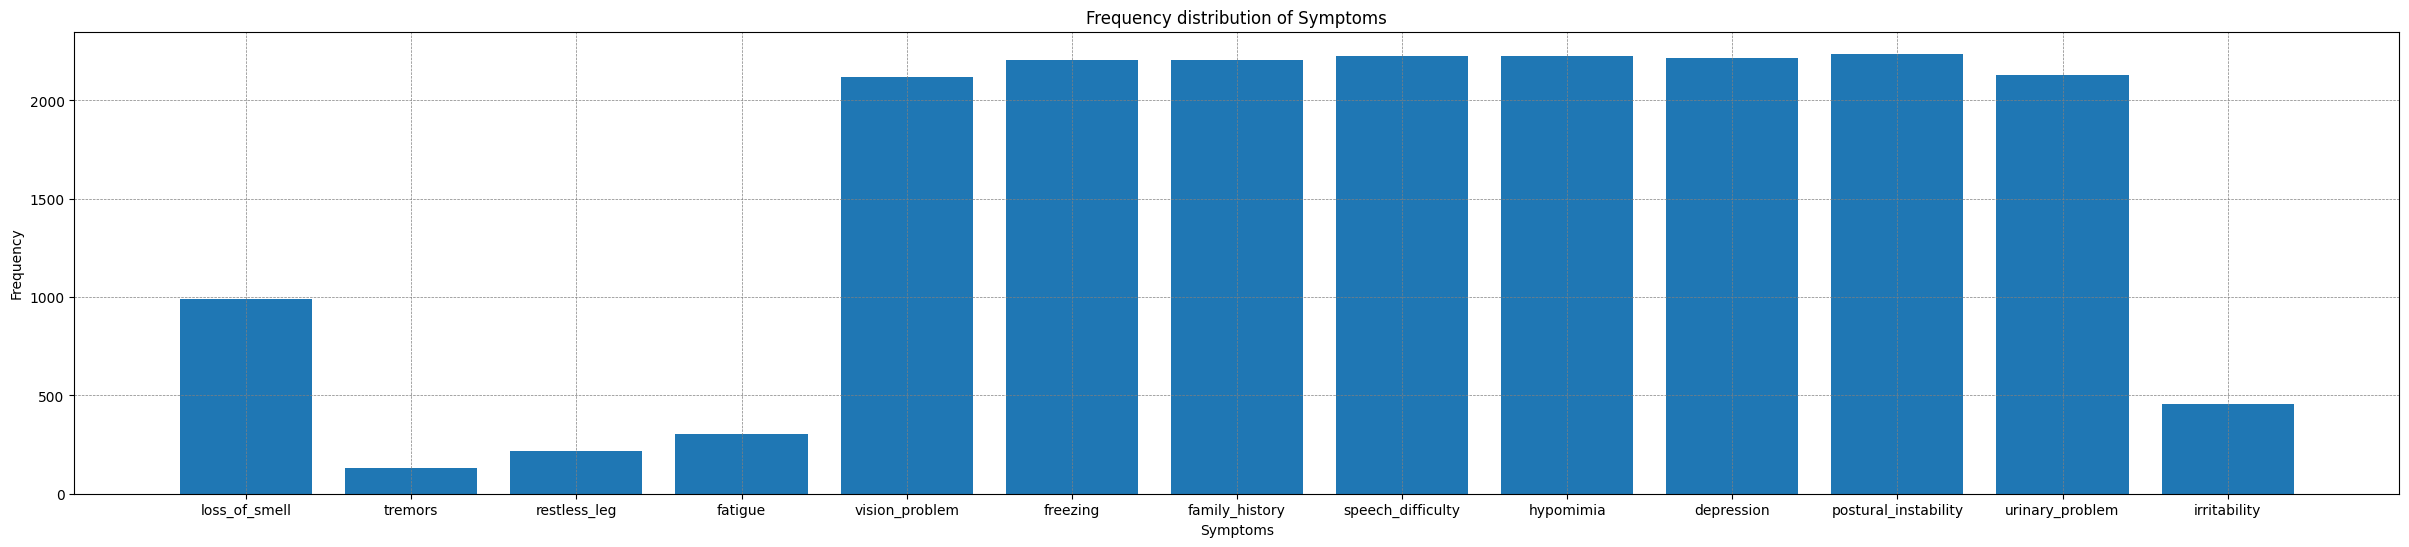

In [12]:
fig, ax = plt.subplots(figsize=(30,6))
ax.bar(cols, counts_cols)
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.title('Frequency distribution of Symptoms')
plt.show()

#### Conclusion: 

The top three symptoms to be found in a parkinsons patient are-

speech_difficulty

hypomimia

postural_instability

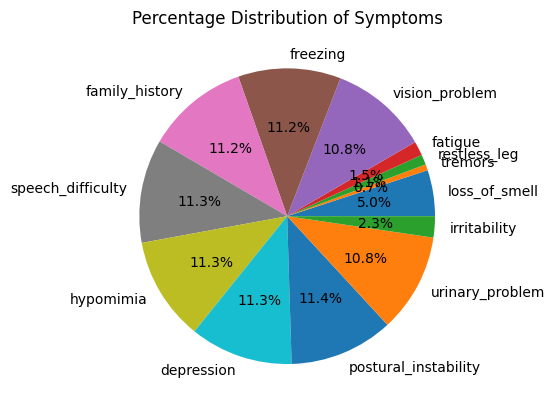

In [13]:
plt.pie(counts_cols, labels=cols, autopct='%1.1f%%')
plt.title('Percentage Distribution of Symptoms')
plt.show()

#### Conclusion:

postural_inability, speech_difficulty, hypomimia and depression are the most common symptoms of parkinsons

In [14]:
ratio = []
for i in range(len(cols)):
    r = round((counts_cols[i]/4246)*100 ,2)
    if r > 50:
        ratio.append([cols[i], r])

In [15]:
df_ratio = pd.DataFrame(ratio, columns=['symptom', 'ratio'])

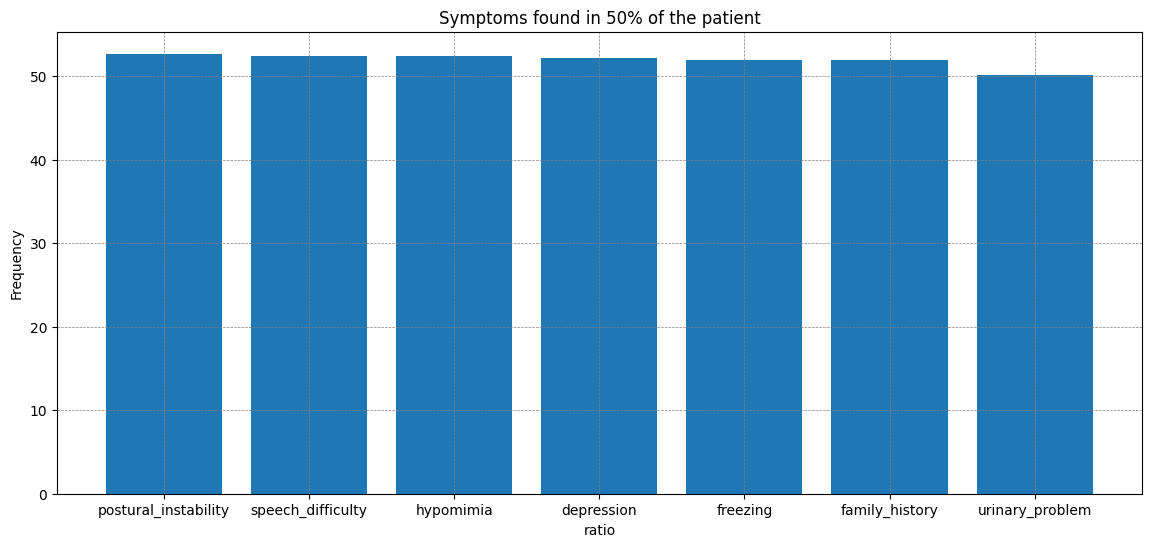

In [16]:
x = df_ratio.sort_values(by='ratio', ascending=False)['symptom']
y = df_ratio.sort_values(by='ratio', ascending=False)['ratio']

fig, ax = plt.subplots(figsize=(14,6))
ax.bar(x, y)
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('ratio')
plt.ylabel('Frequency')
plt.title('Symptoms found in 50% of the patient')
plt.show()

#### Conclusion: 

postural_inability, speech_difficulty, hypomimia, depression, frezzing, family_history and urinary_problem are found in more than 50% of the parkinsons patient

## 4. Creating Train Test split

In [17]:
features = df.drop(['parkinsons'], axis=1)
labels = df['parkinsons']

scaler = MinMaxScaler((-1,1))
X = scaler.fit_transform(features)
Y = labels

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

## 5. Buillding different models

1. Create model
2. fit the model
3. Prediction
4. Calculate accuracy
5. Classification report
6. Confusion Matrix

#### 5.1) Using Decision tree

In [19]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)

acc_dt = accuracy_score(Y_test, Y_pred_dt)*100

print("Accuracy using Decision Tree: ", round(acc_dt, 2))

Accuracy using Decision Tree:  90.85


#### 5.2) Using Random Forest

In [20]:
rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(Y_test, Y_pred_rf)*100

print("Accuracy using Decision Tree: ", round(acc_rf, 2))

Accuracy using Decision Tree:  90.85


#### 5.3) Using XGBoost

In [21]:
model=XGBClassifier(learning_rate=0.1,max_depth=20,verbosity=2,
               random_state=42,scale_pos_weight=1.5,eval_metric='mlogloss',use_label_encoder=False)

model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=20, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.5, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=2)

Y_pred_xgb = model.predict(X_test)

acc_xgb = accuracy_score(Y_test,Y_pred_xgb)*100

[17:52:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=11
[17:52:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=10
[17:52:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=11
[17:52:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=11
[17:52:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cd

C:\Users\gaurav\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[17:52:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=11
[17:52:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=11
[17:52:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=11
[17:52:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=12
[17:52:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cd

[17:52:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=11
[17:52:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=11
[17:52:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=10
[17:52:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=12
[17:52:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cd

In [22]:
print(round(acc_xgb, 2))

90.35


Classification Report:

In [23]:
print(classification_report(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

           0       0.57      0.95      0.71       116
           1       0.99      0.90      0.95       868

    accuracy                           0.91       984
   macro avg       0.78      0.93      0.83       984
weighted avg       0.94      0.91      0.92       984



In [24]:
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.57      0.95      0.71       116
           1       0.99      0.90      0.95       868

    accuracy                           0.91       984
   macro avg       0.78      0.93      0.83       984
weighted avg       0.94      0.91      0.92       984



In [25]:
print(classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.56      0.82      0.67       116
           1       0.97      0.91      0.94       868

    accuracy                           0.90       984
   macro avg       0.77      0.87      0.81       984
weighted avg       0.93      0.90      0.91       984



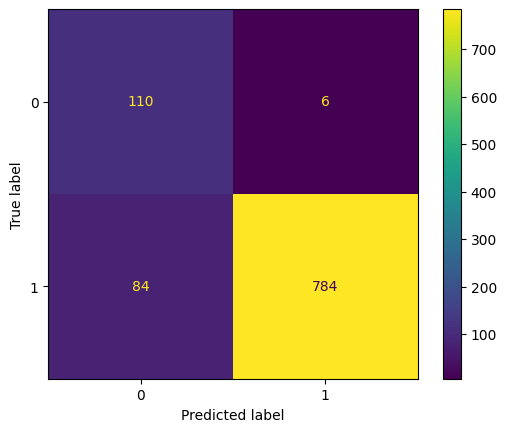

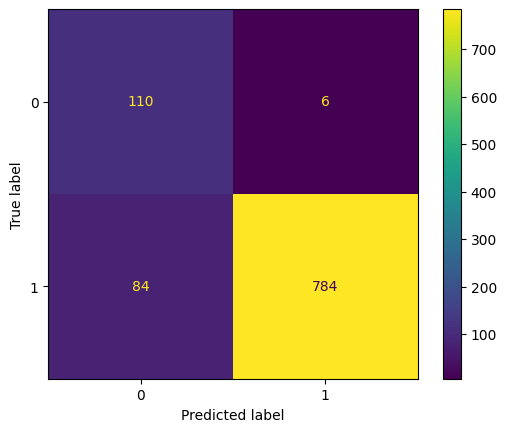

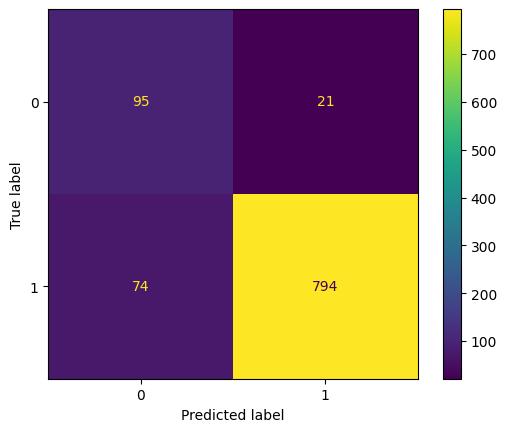

In [26]:
cm_dt = confusion_matrix(Y_test,Y_pred_dt)
cm_rf = confusion_matrix(Y_test,Y_pred_rf)
cm_xgb = confusion_matrix(Y_test,Y_pred_xgb)

disp1 = ConfusionMatrixDisplay(cm_dt)
disp2 = ConfusionMatrixDisplay(cm_rf)
disp3 = ConfusionMatrixDisplay(cm_xgb)

disp1.plot()
disp2.plot()
disp3.plot()

plt.show()

##### 4. Prediction with custom values

In [27]:
new_input = [[0,1,1,0,1,0,1,1,1,0,1,0,0]]

In [28]:
output_dt = decision_tree.predict(new_input)
output_rf = rf.predict(new_input)
output_xgb = model.predict(new_input)

In [29]:
def check_(op):
    if op == 1:
        print("The person have Parkinsons")
    else:
        print("No parkinsons detected")

In [30]:
check_(output_dt)
check_(output_rf)
check_(output_xgb)

The person have Parkinsons
The person have Parkinsons
The person have Parkinsons


In [31]:
import pickle

In [32]:
file_path = 'symptoms_model.pkl'

In [33]:
with open(file_path, 'wb') as file:
    pickle.dump(rf, file)

In [34]:
# Open file and load saved model
with open(file_path, 'rb') as file:
    saved_model = pickle.load(file)
